# 第一题：支持向量机的核函数

实验内容：

1. 了解核函数对SVM的影响
2. 绘制不同核函数的决策函数图像
3. 简述引入核函数的目的

## 1. 导入模型

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 引入数据集
from sklearn.datasets import make_moons

In [3]:
# 引入数据预处理工具
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# 引入支持向量机分类器
from sklearn.svm import SVC

## 2. 生成数据

In [5]:
X, y = make_moons(n_samples = 100, noise = 0.3, random_state = 0)

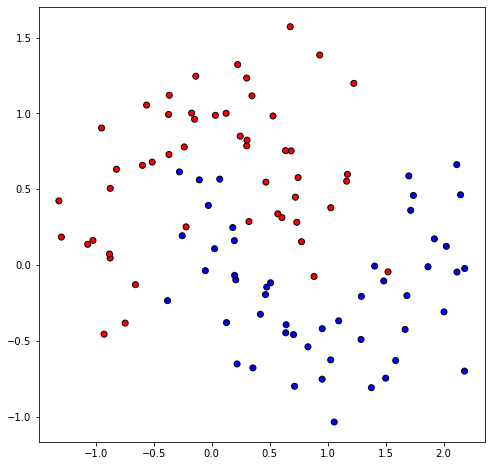

In [6]:
plt.figure(figsize = (8, 8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cm_bright, edgecolors = 'k')

## 3. 数据预处理与划分

In [7]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

训练集和测试集可视化

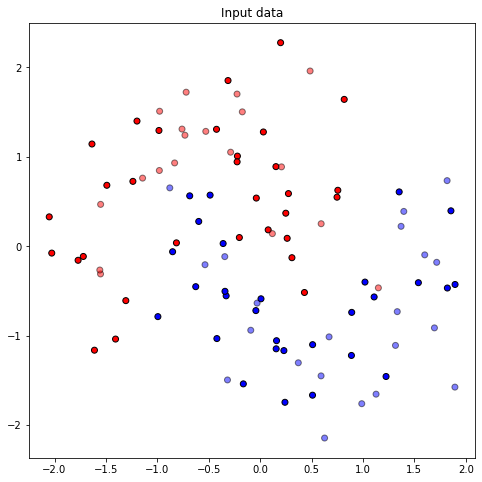

In [8]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize = (8, 8))
plt.title("Input data")

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.5, edgecolors='k')

## 4. 样本到分离超平面距离的可视化

我们使用SVM模型里面的decision_function方法，可以获得样本到分离超平面的距离。

下面的函数将图的背景变成数据点，计算每个数据点到分离超平面的距离，映射到不同深浅的颜色上，绘制出了不同颜色的背景。

In [9]:
def plot_model(model, title):
    
    # 训练模型，计算精度
    model.fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    
    # 将背景网格化
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 计算每个点到分离超平面的距离
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # 设置图的大小
    plt.figure(figsize = (14, 6))
    
    # 绘制训练集的子图
    plt.subplot(121)
    
    # 绘制决策边界
    plt.contourf(xx, yy, Z, cmap = cm, alpha=.8)

    # 绘制训练集的样本
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # 设置图的上下左右界
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # 设置子图标题
    plt.title("training set")
    
    # 图的右下角写出在当前数据集中的精度
    plt.text(xx.max() - .3, yy.min() + .3, ('acc: %.3f' % score_train).lstrip('0'), size=15, horizontalalignment='right')
    
    plt.subplot(122)
    plt.contourf(xx, yy, Z, cmap = cm, alpha=.8)
    
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("testing set")

    plt.text(xx.max() - .3, yy.min() + .3, ('acc: %.3f' % score_test).lstrip('0'), size=15, horizontalalignment='right')

    plt.suptitle(title)

我们尝试绘制线性核的分类效果图

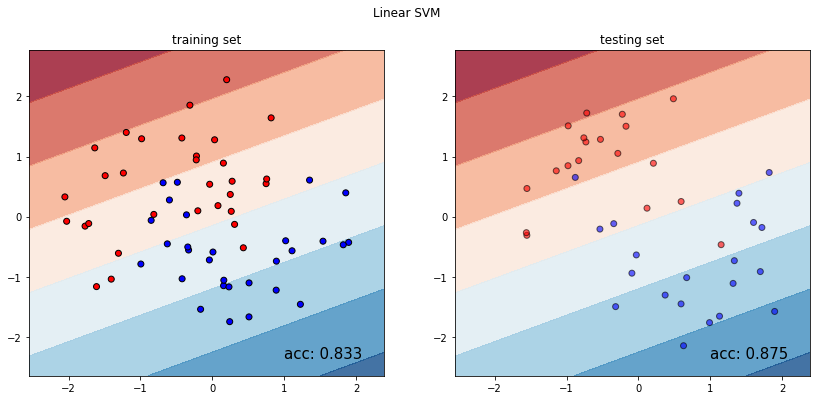

In [10]:
plot_model(SVC(kernel = "linear", probability = True), 'Linear SVM')

# 作业1：请你尝试使用其他的核函数，绘制分类效果图

## 1. 高斯核，又称径向基函数(Radial Basis Function)，指定kernel为"rbf"即可

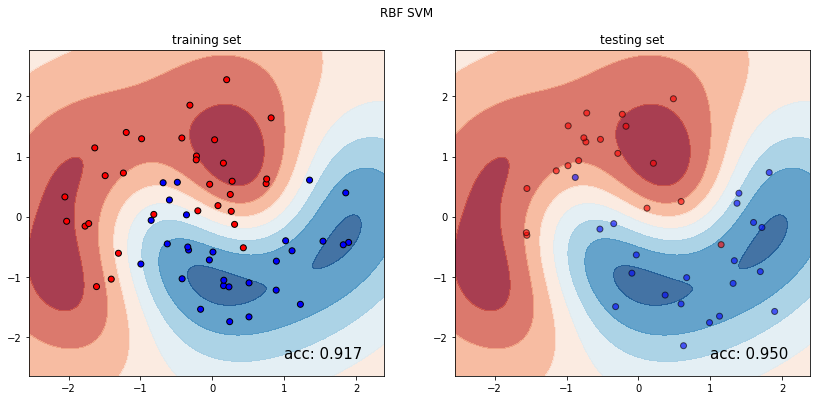

In [11]:
# YOUR CODE HERE
plot_model(SVC(kernel = "rbf", probability = True), 'RBF SVM')

## 2. sigmoid核，指定kernel为"sigmoid"即可

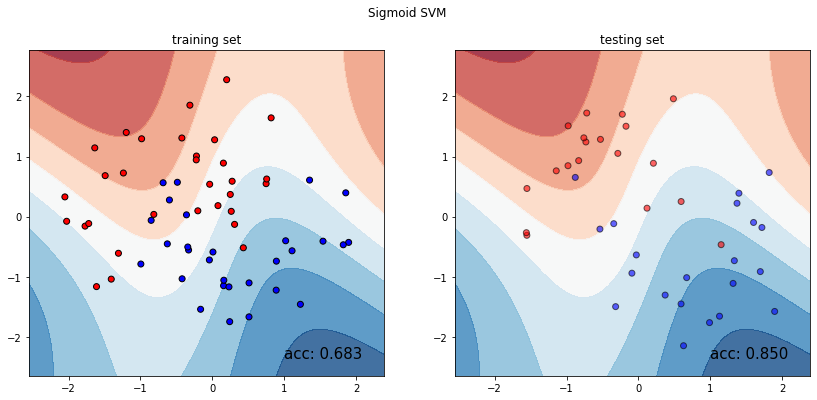

In [12]:
# YOUR CODE HERE
plot_model(SVC(kernel = "sigmoid", probability = True), 'Sigmoid SVM')

## 3. 多项式核，指定kernel为"poly"即可

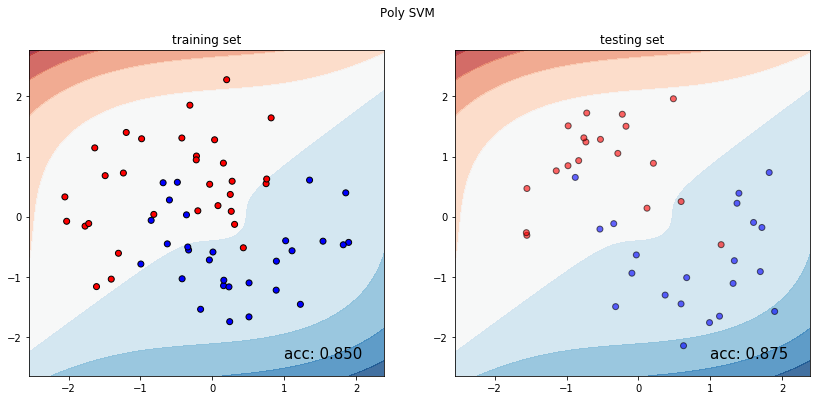

In [14]:
# YOUR CODE HERE
plot_model(SVC(kernel = "poly", probability = True), 'Poly SVM')

# 作业2：简述为什么要引入核函数？

解决线性不可分问题时，需要把样本值映射到高维空间，在这个高维空间内使用分类问题的方法时，要计算向量内积，核函数可将求高维向量内积转为求低维向量内积，降低运算复杂度。